## Voting
---

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import my_utils as my

#### 데이터 준비

In [5]:
from sklearn import datasets

iris = datasets.load_iris()
type(iris)   # 데이터 읽어올 때 type 먼저 확인할 것

sklearn.utils._bunch.Bunch

In [6]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
print(iris["target_names"])
print(iris.target_names)

['setosa' 'versicolor' 'virginica']
['setosa' 'versicolor' 'virginica']


In [8]:
iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
df = pd.DataFrame(iris["data"], columns=iris["feature_names"])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
df["target"] = iris["target"]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
# 결측치 확인
# 중복치 확인

#### 데이터 분리

In [12]:
x_data = df.drop("target", axis=1)
x_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
y_data = df["target"]
y_data.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, stratify=y_data, random_state=1)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(120, 4) (30, 4)
(120,) (30,)


#### 정규화
* 트리 기반 모델은 정규화 안해도 됨
* 학습 데이터로만 스케일링을 수행

In [15]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(x_train)

x_train = ss.fit_transform(x_train)   # x_train = ss.transform(x_train) + x_test = ss.transform(x_test)
x_train[:5]   # NumPy로 변환됨

array([[-0.91782384,  1.5241518 , -1.28391928, -1.0458439 ],
       [-1.51445906,  0.32717395, -1.33998562, -1.30595015],
       [ 1.23006294,  0.08777838,  0.73446911,  1.42516552],
       [-0.44051567, -1.10919948,  0.3420047 , -0.00541888],
       [-0.32118863, -0.39101277, -0.10652605,  0.12463425]])

#### ㅁㄴㅇ

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

clf1 = KNeighborsClassifier()
clf2 = SVC()
clf3 = DecisionTreeClassifier()
clf = VotingClassifier(estimators = [("knn", clf1), ("svc", clf2), ("tree", clf3)], voting="hard", weights=[1, 1, 1])

In [17]:
clf.fit(x_train, y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier()), ('svc', SVC()),
                             ('tree', DecisionTreeClassifier())],
                 weights=[1, 1, 1])

In [18]:
clf.score(x_train, y_train)

0.975

In [19]:
x_test = ss.transform(x_test)
y_test = y_test.values

In [20]:
y_pred = clf.predict(x_test)
y_pred[:5]

array([2, 0, 1, 0, 0])

In [21]:
my.print_score(y_test, y_pred, average="macro")

accuracy : 0.9666666666666667
precision : 0.9696969696969697
recall : 0.9666666666666667


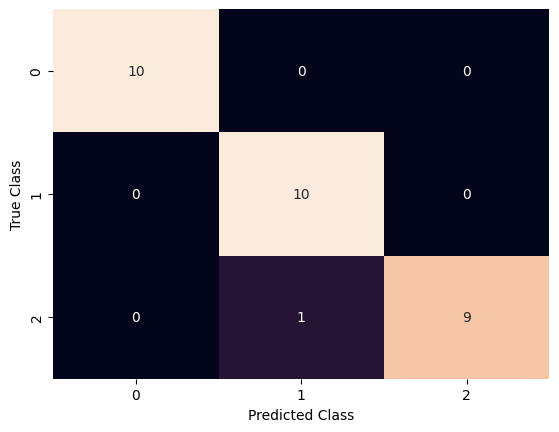

In [22]:
my.plot_confusion_matrix(y_test, y_pred)